## 案例1

随机森林准确率: 1.0
梯度提升树准确率: 1.0


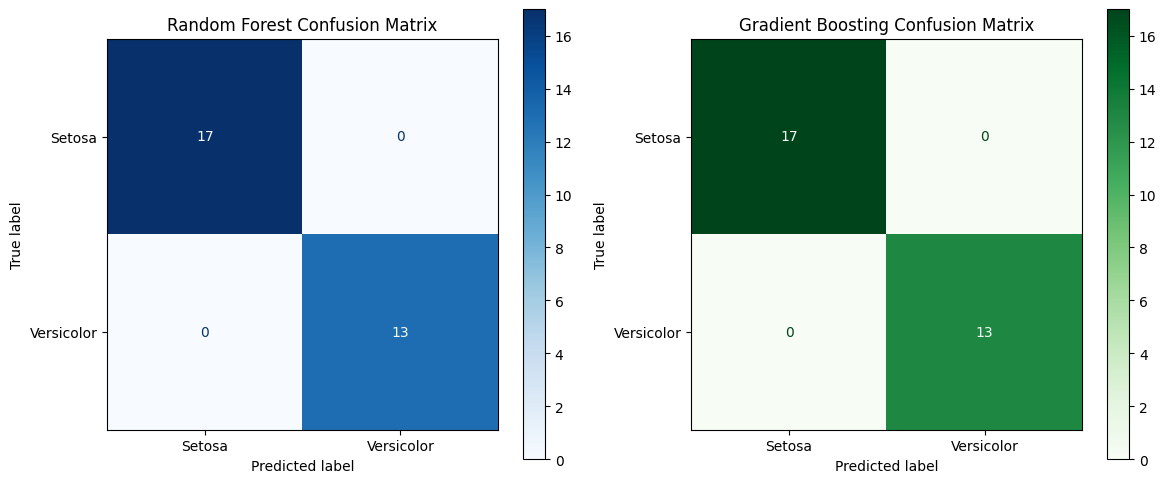

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. 加载鸢尾花数据集，并将其简化为一个二分类问题（只保留前两类“Setosa”和“Versicolor”）
iris = load_iris()
X = iris.data[iris.target != 2]  # 只保留前两类
y = iris.target[iris.target != 2]

# 2. 数据集被划分为训练集和测试集，比例为7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 使用随机森林（Random Forest）模型进行训练
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 使用梯度提升树（Gradient Boosting）模型进行训练
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# 4. 训练完成后，我们对测试集进行预测，并计算每个模型的准确率
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

print("随机森林准确率:", accuracy_score(y_test, rf_pred))
print("梯度提升树准确率:", accuracy_score(y_test, gb_pred))

# 5. 最后，绘制两个模型的混淆矩阵图，用于直观比较它们的分类性能
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 随机森林混淆矩阵
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred), display_labels=["Setosa", "Versicolor"]).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Random Forest Confusion Matrix")

# 梯度提升树混淆矩阵
ConfusionMatrixDisplay(confusion_matrix(y_test, gb_pred), display_labels=["Setosa", "Versicolor"]).plot(ax=axes[1], cmap="Greens")
axes[1].set_title("Gradient Boosting Confusion Matrix")

plt.tight_layout()
plt.show()

## 案例2

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 加载加州房价数据集
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)  # 特征
y = california.target  # 目标变量（房价）

# 2. 数据集被划分为训练集和测试集，比例为8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 使用随机森林（Random Forest）模型进行训练
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 使用梯度提升树（Gradient Boosting）模型进行训练
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# 4. 训练完成后，我们对测试集进行预测，并计算每个模型的性能指标
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# 计算均方误差（MSE）和决定系数（R²）
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print("随机森林 - 均方误差 (MSE):", rf_mse)
print("随机森林 - 决定系数 (R²):", rf_r2)

print("梯度提升树 - 均方误差 (MSE):", gb_mse)
print("梯度提升树 - 决定系数 (R²):", gb_r2)

# 5. 可视化真实值与预测值的对比
plt.figure(figsize=(12, 6))

# 随机森林预测结果
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Random Forest: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# 梯度提升树预测结果
plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Gradient Boosting: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

d:\ProgramData\miniconda\envs\pytorch\lib\site-packages\sklearn\datasets\_base.py:1472: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden

## 案例2

过滤法特征选择后的准确率: 0.9532163742690059
包裹法特征选择后的准确率: 0.9649122807017544
嵌入法特征选择后的准确率: 0.9532163742690059
未进行特征选择的随机森林准确率: 0.9707602339181286


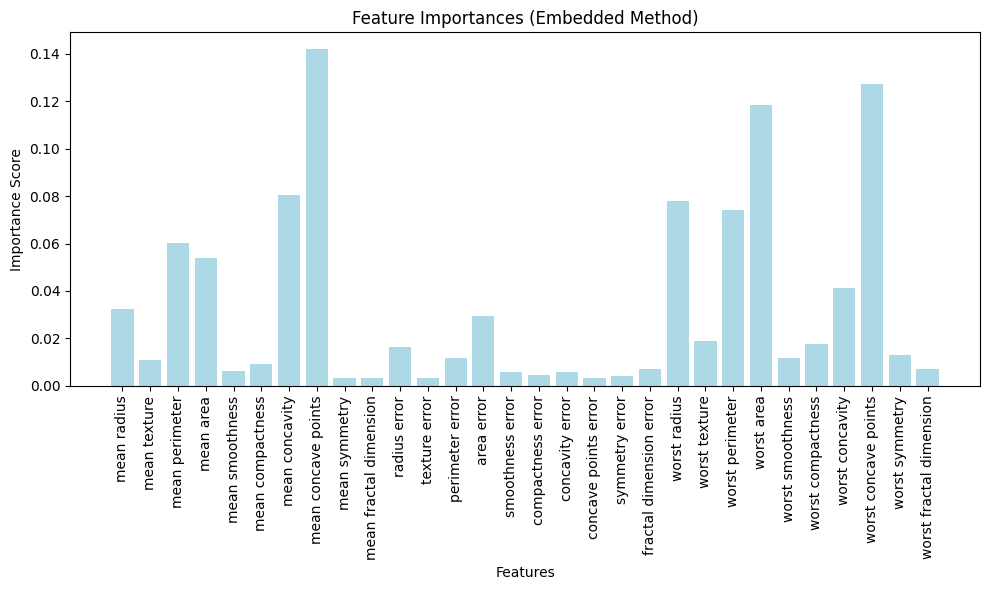

## 案例3

随机森林准确率: 0.7532467532467533
梯度提升树准确率: 0.7489177489177489
AdaBoost准确率: 0.7142857142857143


d:\ProgramData\miniconda\envs\pytorch\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


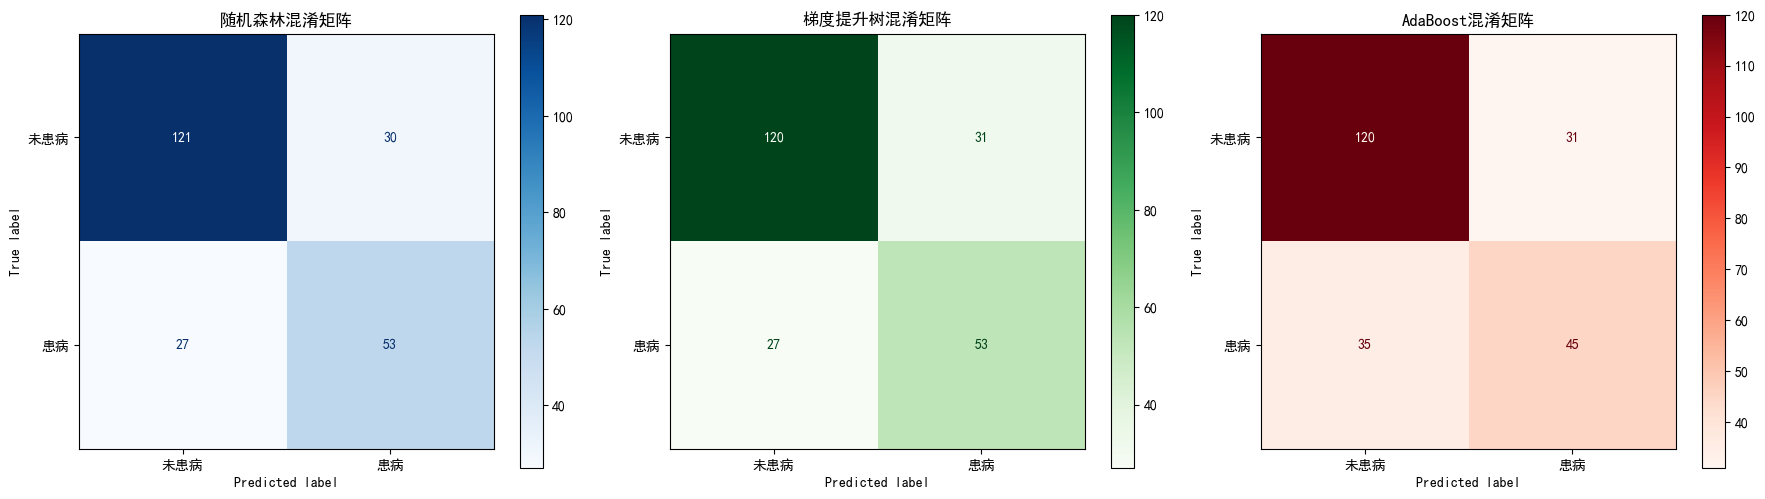

In [ ]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. 加载糖尿病数据集并准备数据
# 数据集可以从以下链接下载：https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database，假设数据存放到data文件夹
data = pd.read_csv("../data/diabetes.csv")  # 假设数据文件名为 diabetes.csv
X = data.drop(columns=["Outcome"])  # 特征矩阵
y = data["Outcome"]  # 目标变量（0: 未患病, 1: 患病）

# 数据集被划分为训练集和测试集，比例为7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 使用随机森林（Random Forest）进行训练和预测
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("随机森林准确率:", accuracy_score(y_test, rf_pred))

# 3. 使用梯度提升树（Gradient Boosting）进行训练和预测
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("梯度提升树准确率:", accuracy_score(y_test, gb_pred))

# 4. 使用AdaBoost进行训练和预测
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print("AdaBoost准确率:", accuracy_score(y_test, ada_pred))

# 设置支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置支持负号
plt.rcParams['axes.unicode_minus'] = False
# 5. 绘制混淆矩阵以直观比较三种方法的分类效果
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 随机森林混淆矩阵
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred), display_labels=["未患病", "患病"]).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("随机森林混淆矩阵")

# 梯度提升树混淆矩阵
ConfusionMatrixDisplay(confusion_matrix(y_test, gb_pred), display_labels=["未患病", "患病"]).plot(ax=axes[1], cmap="Greens")
axes[1].set_title("梯度提升树混淆矩阵")

# AdaBoost混淆矩阵
ConfusionMatrixDisplay(confusion_matrix(y_test, ada_pred), display_labels=["未患病", "患病"]).plot(ax=axes[2], cmap="Reds")
axes[2].set_title("AdaBoost混淆矩阵")

plt.tight_layout()
plt.show()
